In [1]:
# 建立逻辑回归分类器

In [3]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [15]:
# 创建数据
X = np.array([[4, 7], [3.5, 8], [3.1, 6.2], [0.5, 1], [1, 2],[1.2, 1.9], [6, 2], [5.7, 1.5], [5.4, 2.2]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2])
# 初始化逻辑回归分类器
# 参数C表示对分类错误（misclassification）的惩罚值
# 随着参数C的不断增大，分类错误的惩罚值越高。因此，各个类型的边界更优
classifier = linear_model.LogisticRegression(solver='liblinear',C=10000)# 参数C表示惩罚值
# 训练分类器
classifier.fit(X,y)

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

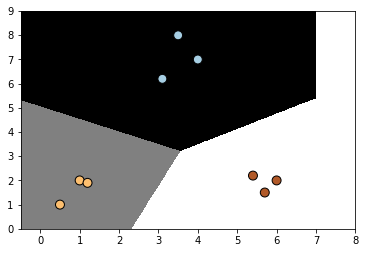

In [16]:
# 图示
# 定义plot_classifier函数
def plot_classifier(classifier,X,y):
    # 定义横纵坐标的取值范围
    x_min,x_max = min(X[:,0]) - 1.0,max(X[:,0]) + 1.0
    y_min,y_max = min(X[:,1]) - 1.0,max(X[:,1]) + 1.0
    # 使用网格数据求出方程的值，然后画出边界
    # 定义网格数据的步长
    step_size = 0.01
    # 定义网格
    x_values,y_values = np.meshgrid(np.arange(x_min,x_max,step_size),np.arange(y_min,y_max,step_size))

    # 计算出分类器对所有数据点的分类结果
    mesh_output= classifier.predict(np.c_[x_values.ravel(),y_values.ravel()])
    # 数组维度变形
    mesh_output = mesh_output.reshape(x_values.shape)
    # 用彩图画出分类结果
    plt.figure()
    # 选择配色方案
    plt.pcolormesh(x_values,y_values,mesh_output,cmap=plt.cm.gray)
    
    # 把训练数据点画在图上
    plt.scatter(X[:,0],X[:,1],c=y,s=80,edgecolors='black',linewidth=1,cmap=plt.cm.Paired)# c=y表示颜色的使用顺序
    # 设置图像的取值范围
    plt.xlim(x_values.min(),x_values.max())
    plt.ylim(y_values.min(),y_values.max())
    # 设置X轴与Y轴
    plt.xticks((np.arange(int(min(X[:, 0])-1),int(max(X[:, 0])+1),1.0)))
    plt.xticks((np.arange(int(min(X[:, 1])-1),int(max(X[:, 1])+1),1.0)))
    
    plt.show()

    
plot_classifier(classifier,X,y)    